In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles

In [2]:
# Set up the database connection
opsdb = db.OpsimDatabase('minion_1016_sqlite.db')
outDir = 'output'
resultsDb = db.ResultsDb(outDir=outDir)

In [3]:
# want something centered on RA=94, Dec=-28.4
pad = 7
dec = -28.4
ra = 94.
dec_range = np.radians([dec-pad, dec+pad])
ra_range = np.radians([ra-pad/np.cos(np.radians(dec)), ra+pad/np.cos(np.radians(dec))])
sql = 'ditheredDec > %f and ditheredDec < %f and ditheredRA < %f and ditheredRA > %f' % (dec_range.min(), dec_range.max(), ra_range.max(), ra_range.min())
# Note this is assuming the FoV is a perfect circle, can turn on the full focal plane geometry, just increases runtime
slicer = slicers.HealpixSlicer(nside=128)
bundleList = []
# Let's look at the mean and median seeing, airmass, skybrightness. 
for col in ['FWHMeff', 'airmass']:
    metric = metrics.MeanMetric(col=col)
    bundle = metricBundles.MetricBundle(metric, slicer, sql)
    bundleList.append(bundle)
    metric = metrics.MedianMetric(col=col)
    bundle = metricBundles.MetricBundle(metric, slicer, sql)
    bundleList.append(bundle)
    metric = metrics.RmsMetric(col=col)
    bundle = metricBundles.MetricBundle(metric, slicer, sql)
    bundleList.append(bundle)


Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


In [4]:
bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()

Querying database with constraint ditheredDec > -0.617847 and ditheredDec < -0.373500 and ditheredRA < 1.779498 and ditheredRA > 1.501721
Found 23044 visits
Running:  ['opsim_Median_FWHMeff_ditheredDec_gt_-0_617847_and_ditheredDec_lt_-0_373500_and_ditheredRA_lt_1_779498_and_ditheredRA_gt_1_501721_HEAL', 'opsim_Mean_airmass_ditheredDec_gt_-0_617847_and_ditheredDec_lt_-0_373500_and_ditheredRA_lt_1_779498_and_ditheredRA_gt_1_501721_HEAL', 'opsim_Rms_FWHMeff_ditheredDec_gt_-0_617847_and_ditheredDec_lt_-0_373500_and_ditheredRA_lt_1_779498_and_ditheredRA_gt_1_501721_HEAL', 'opsim_Rms_airmass_ditheredDec_gt_-0_617847_and_ditheredDec_lt_-0_373500_and_ditheredRA_lt_1_779498_and_ditheredRA_gt_1_501721_HEAL', 'opsim_Mean_FWHMeff_ditheredDec_gt_-0_617847_and_ditheredDec_lt_-0_373500_and_ditheredRA_lt_1_779498_and_ditheredRA_gt_1_501721_HEAL', 'opsim_Median_airmass_ditheredDec_gt_-0_617847_and_ditheredDec_lt_-0_373500_and_ditheredRA_lt_1_779498_and_ditheredRA_gt_1_501721_HEAL']
Completed metric gen

Plotting figures with "ditheredDec > -0.617847 and ditheredDec < -0.373500 and ditheredRA < 1.779498 and ditheredRA > 1.501721" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/plots/spatialPlotters.py:177: UserWarning: XXX-Not removing dipole, need healpy updated on python 3 first
  warnings.warn('XXX-Not removing dipole, need healpy updated on python 3 first')


Plotting complete.


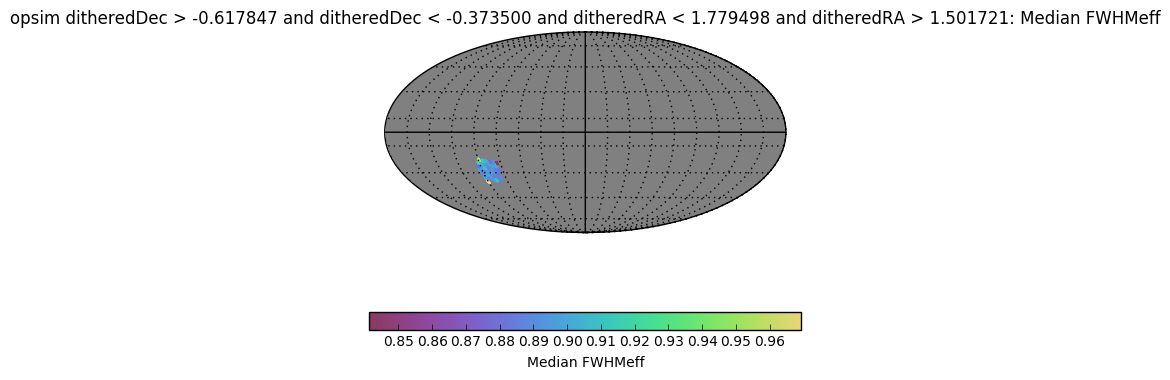

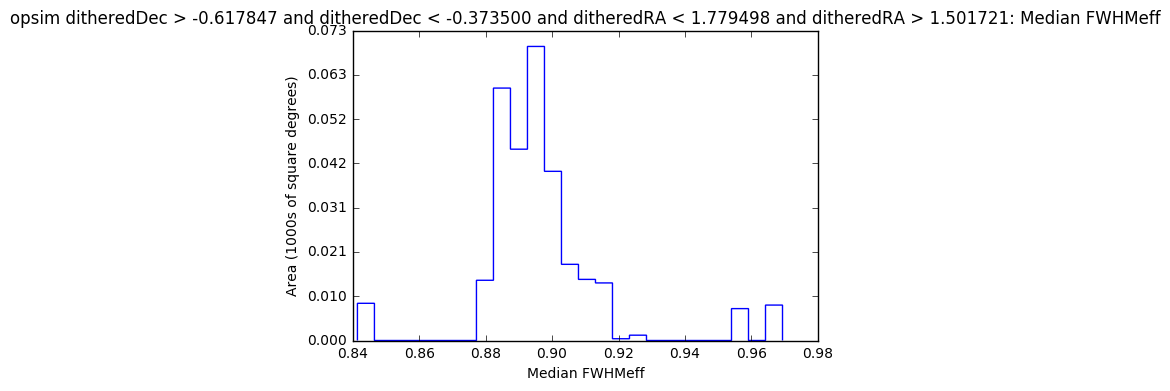

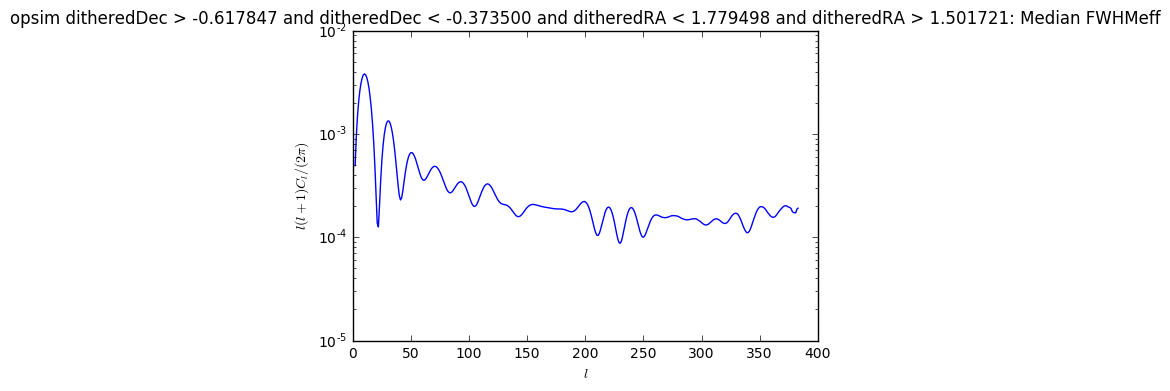

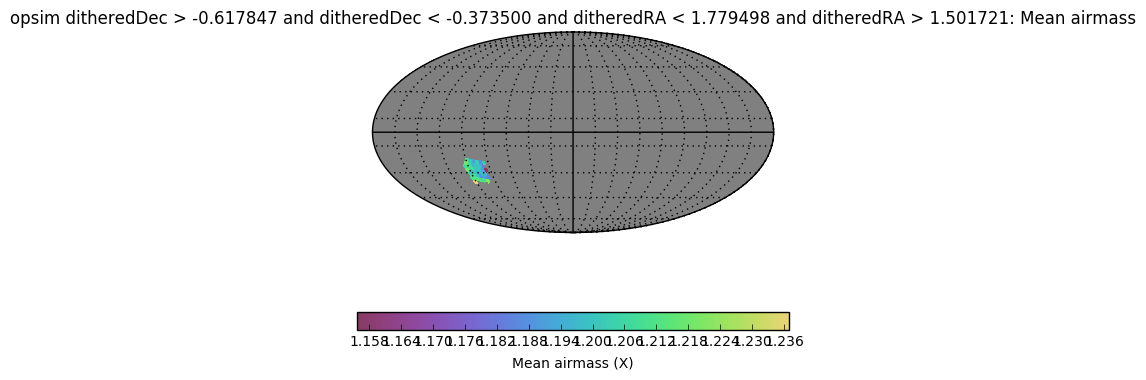

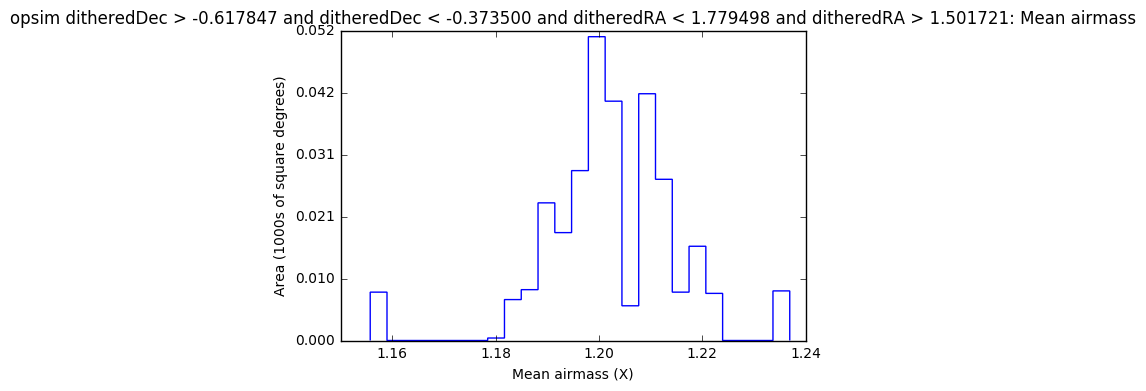

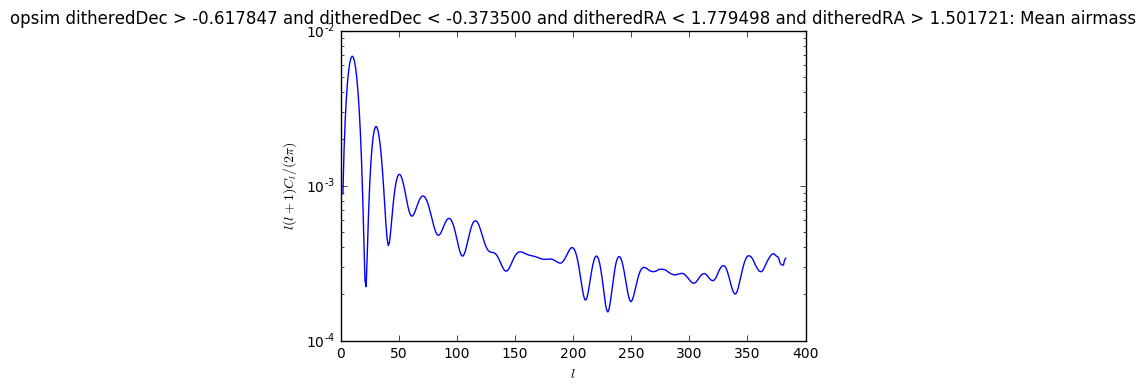

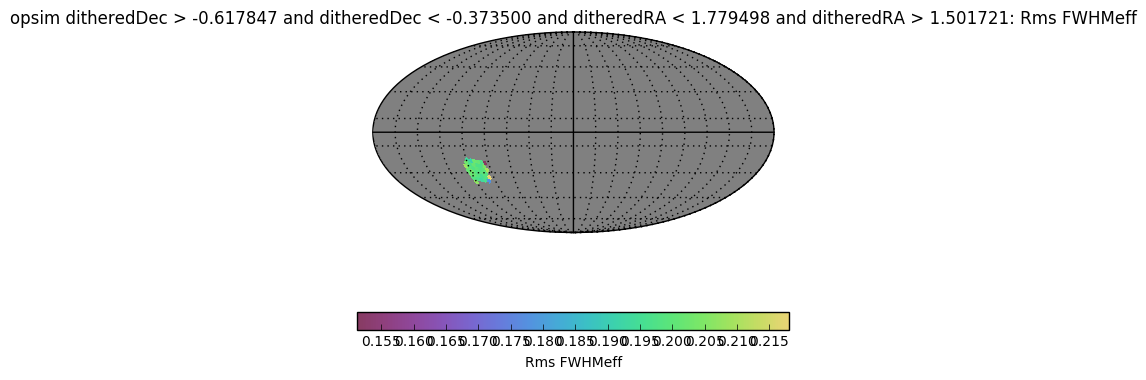

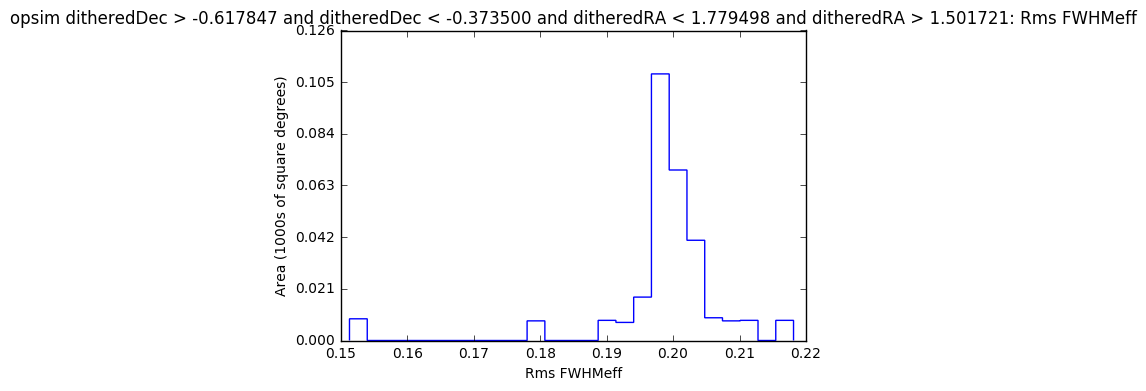

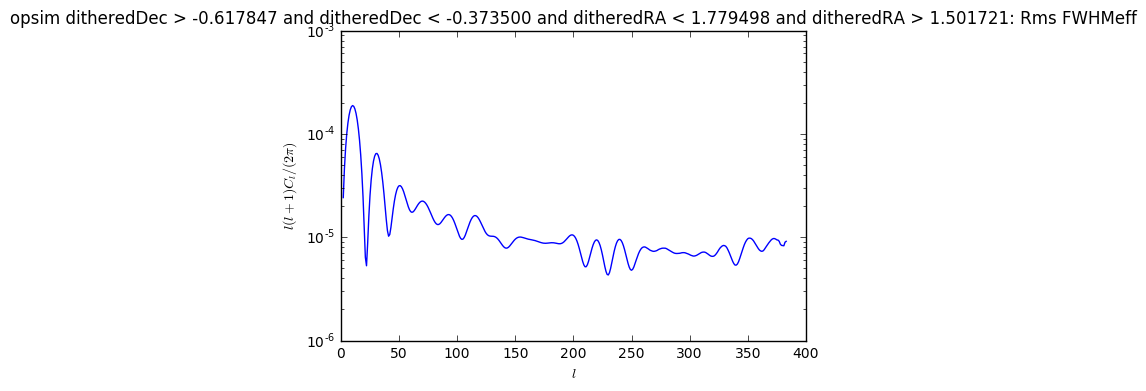

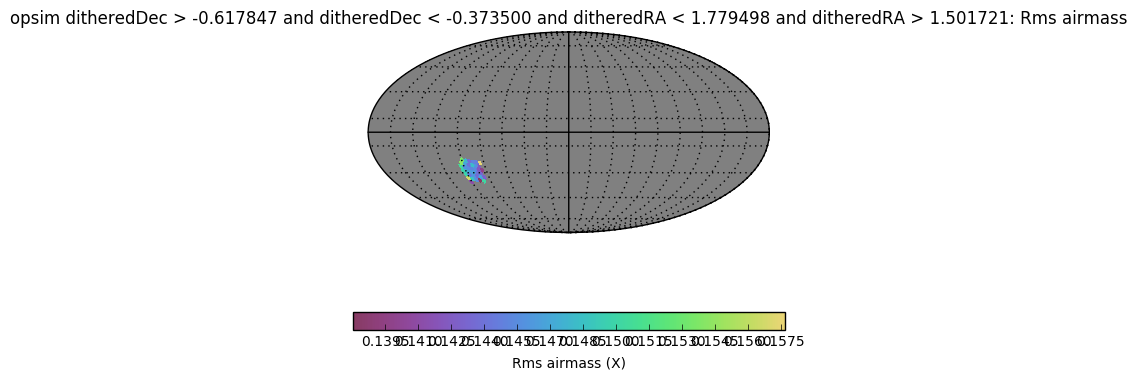

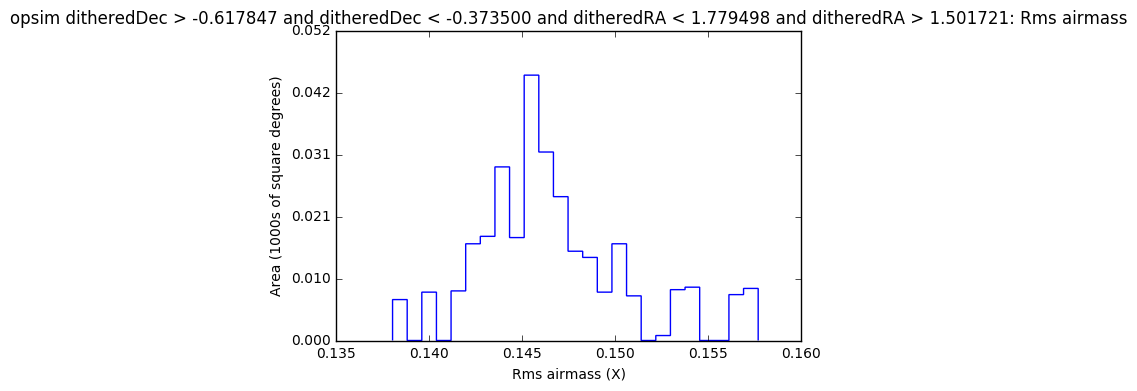

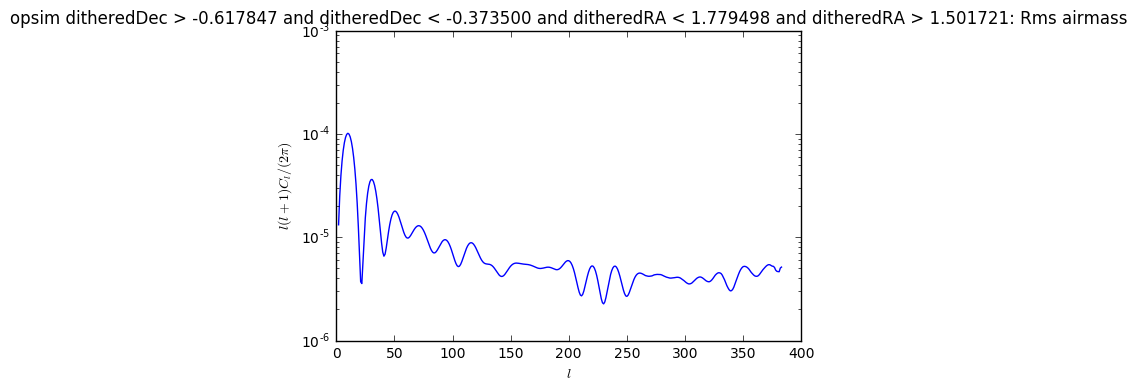

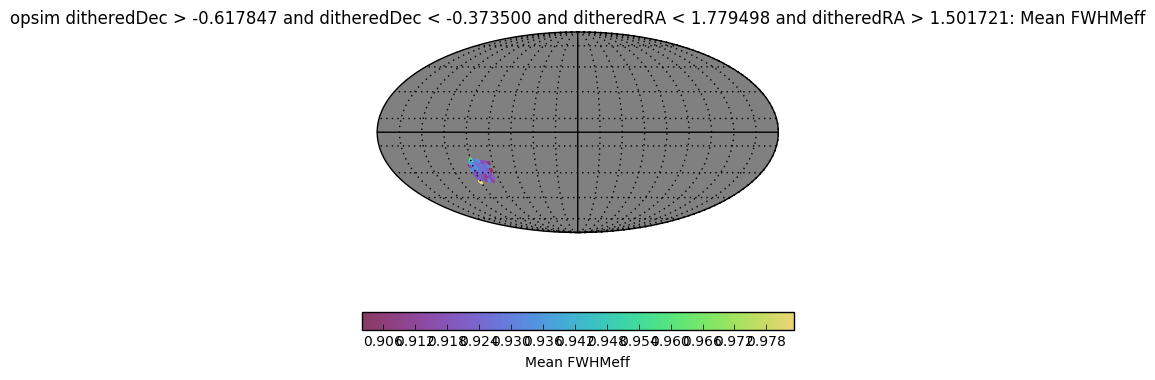

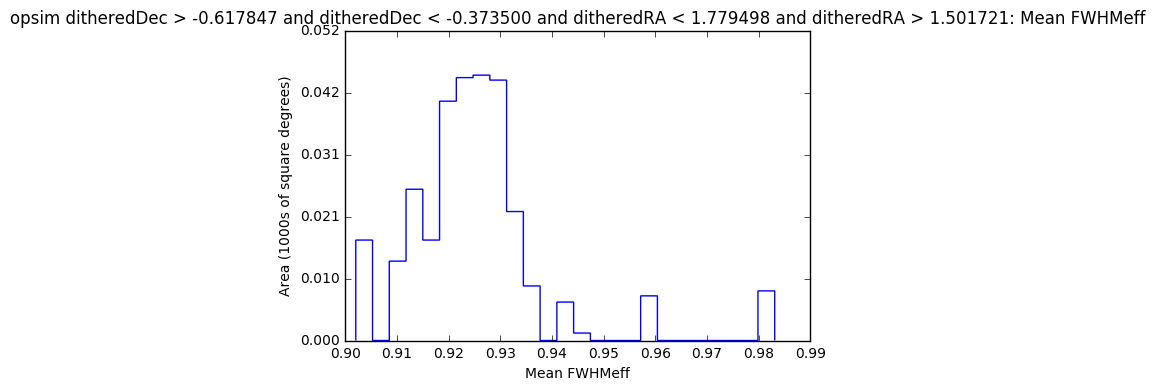

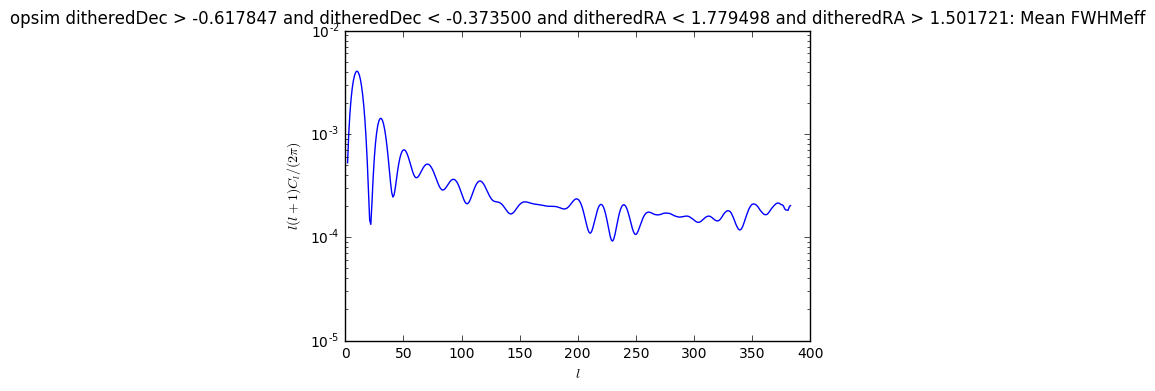

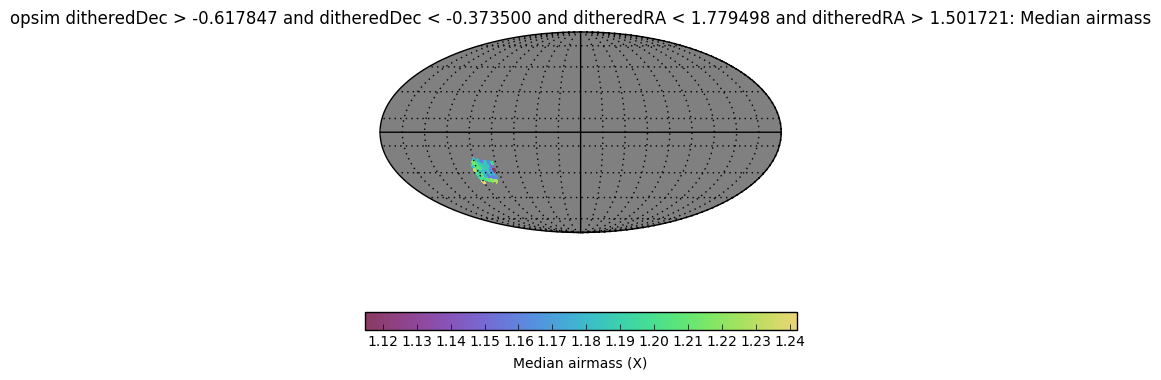

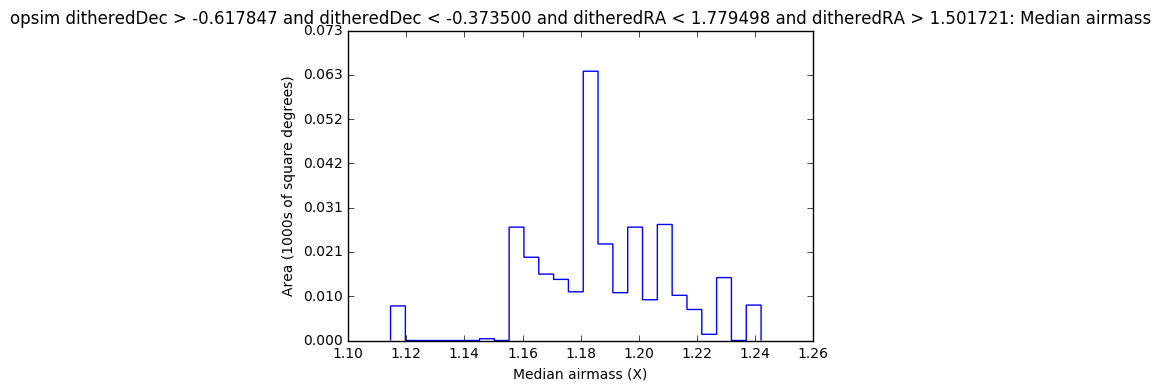

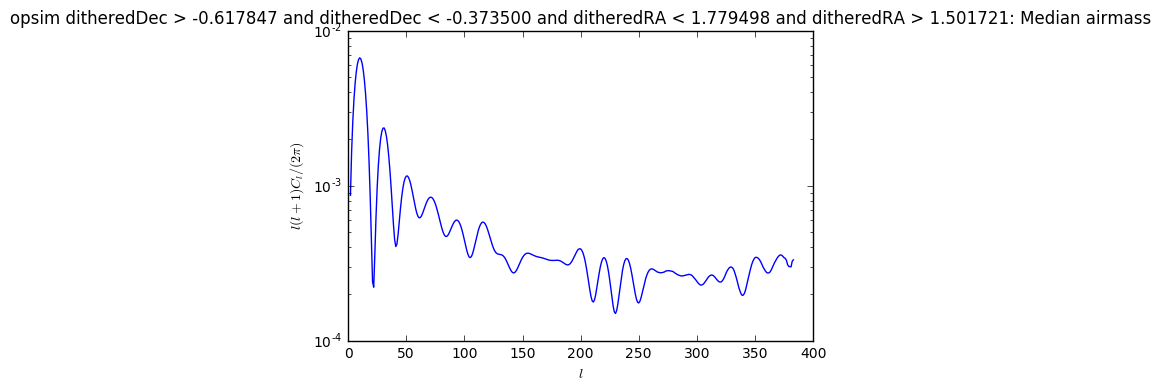

In [5]:
bgroup.plotAll(closefigs=False)

In [12]:
# Now let's do some things that make more sense per filter
filters = ['u', 'g', 'r', 'i', 'z', 'y']
bundleList = []
for filtername in filters:
    sql_filt = sql+' and filter="%s"' % filtername
    metric = metrics.MeanMetric(col='filtSkyBrightness', metricName='Mean %s, %s'% ('filtSkyBrightness', filtername))
    bundle = metricBundles.MetricBundle(metric, slicer, sql_filt)
    bundleList.append(bundle)
    
    metric = metrics.MeanMetric(col='fiveSigmaDepth', metricName='Mean %s, %s'% ('5-sigma depth', filtername))
    bundle = metricBundles.MetricBundle(metric, slicer, sql_filt)
    bundleList.append(bundle)


Querying database with constraint ditheredDec > -0.617847 and ditheredDec < -0.373500 and ditheredRA < 1.779498 and ditheredRA > 1.501721 and filter="g"
Found 2233 visits
Running:  ['opsim_Mean_5-sigma_depth_g_ditheredDec_gt_-0_617847_and_ditheredDec_lt_-0_373500_and_ditheredRA_lt_1_779498_and_ditheredRA_gt_1_501721_and_g_HEAL', 'opsim_Mean_filtSkyBrightness_g_ditheredDec_gt_-0_617847_and_ditheredDec_lt_-0_373500_and_ditheredRA_lt_1_779498_and_ditheredRA_gt_1_501721_and_g_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint ditheredDec > -0.617847 and ditheredDec < -0.373500 and ditheredRA < 1.779498 and ditheredRA > 1.501721 and filter="r"
Found 5045 visits
Running:  ['opsim_Mean_5-sigma_depth_r_ditheredDec_gt_-0_617847_and_ditheredDec_lt_-0_373500_and_ditheredRA_lt_1_779498_and_ditheredRA_gt_1_501721_and_r_HEAL', 'opsim_Mean_filtSkyBrightness_r_ditheredDec_gt_-0_617847_and_ditheredDec_lt_-0_373500_and_dit

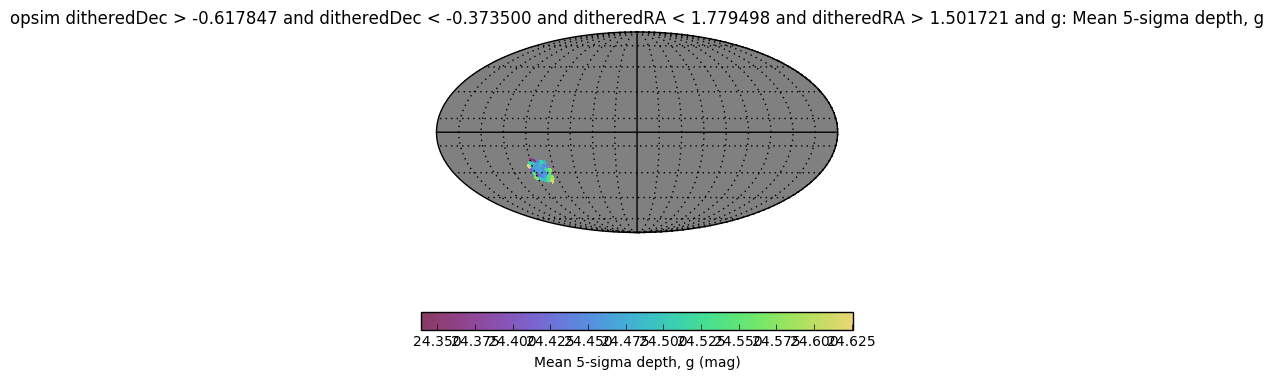

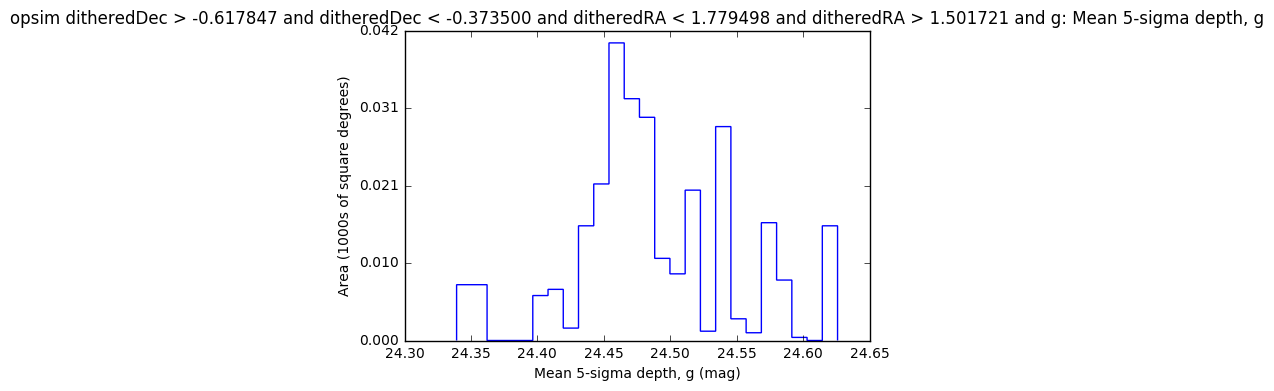

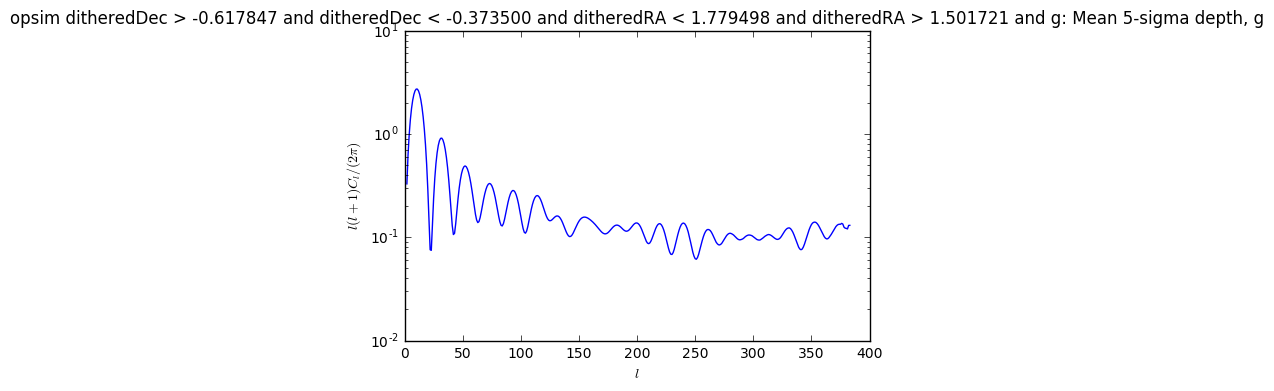

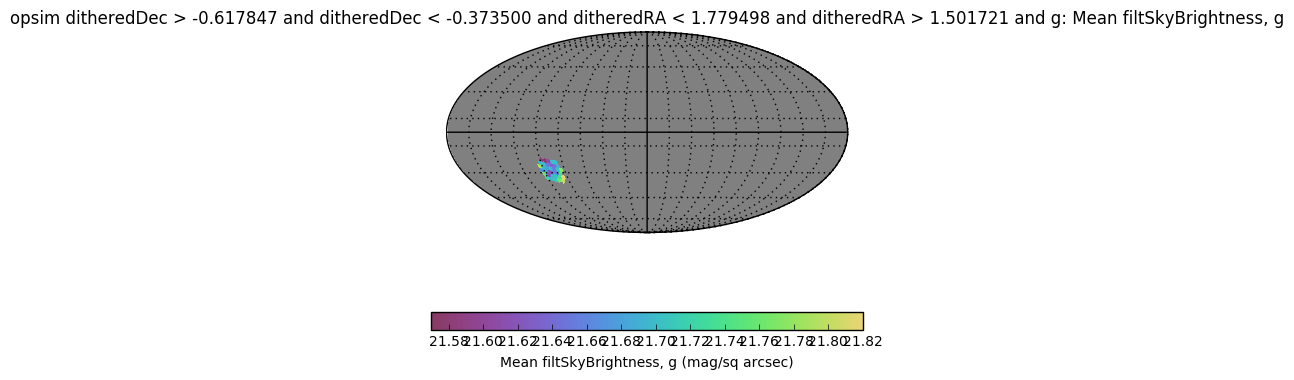

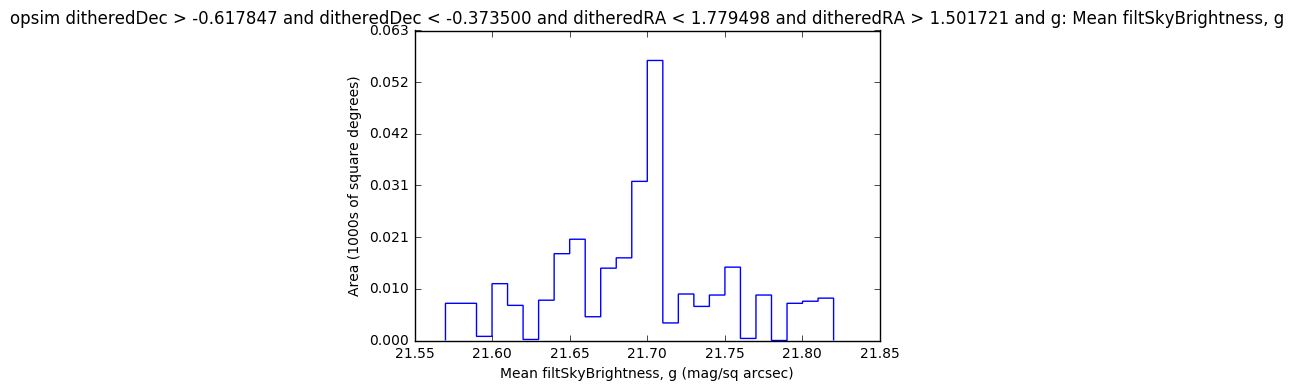

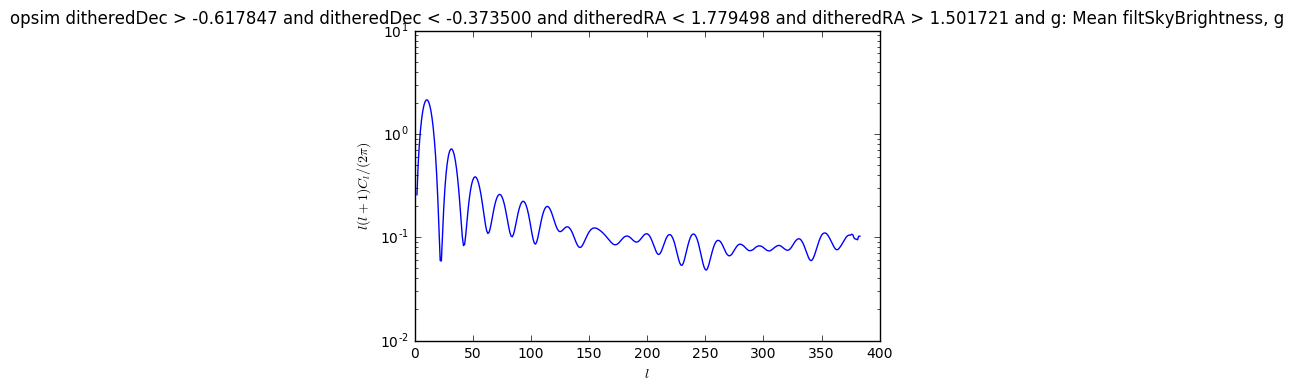

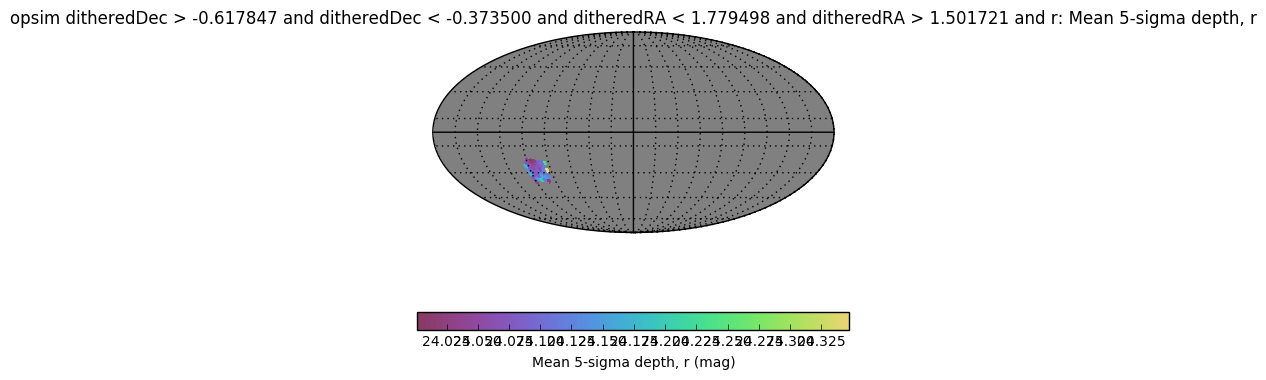

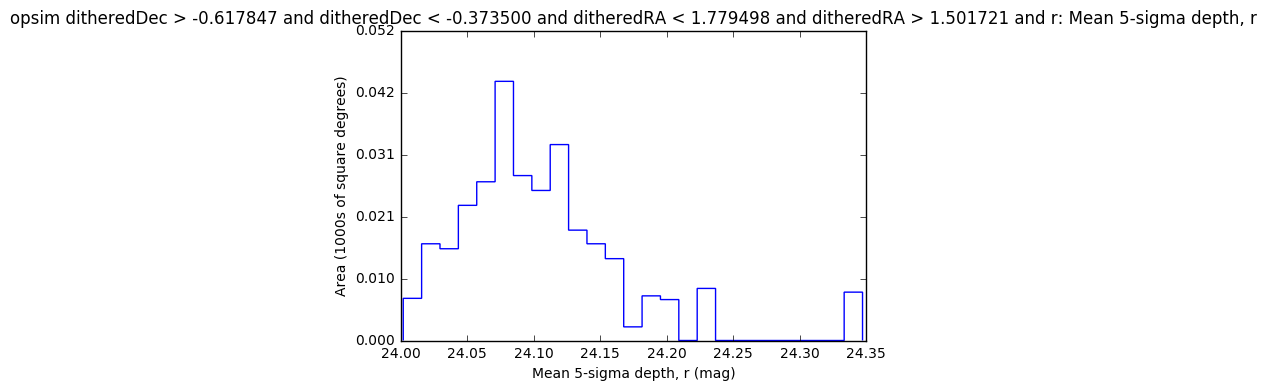

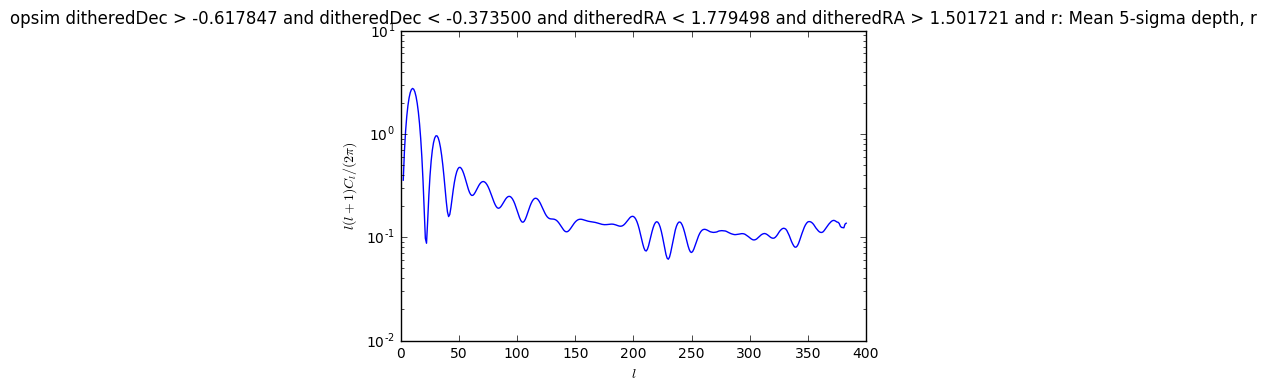

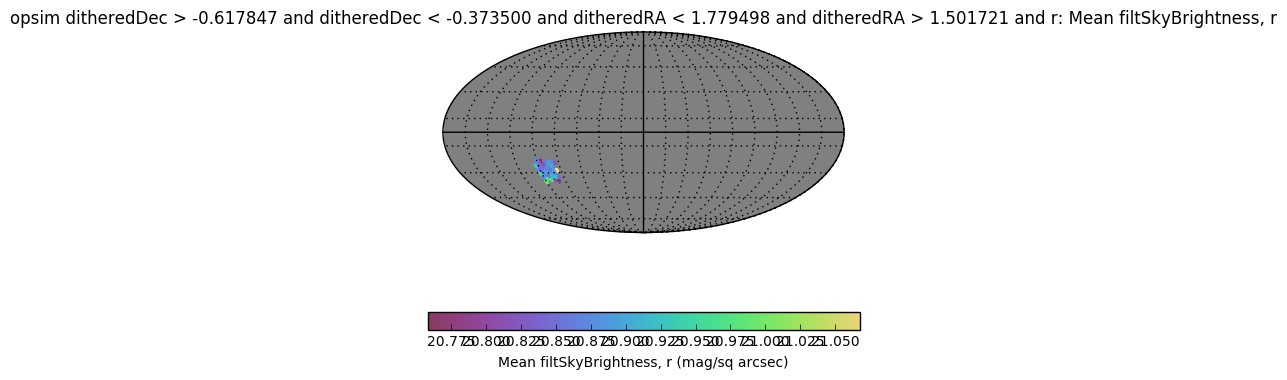

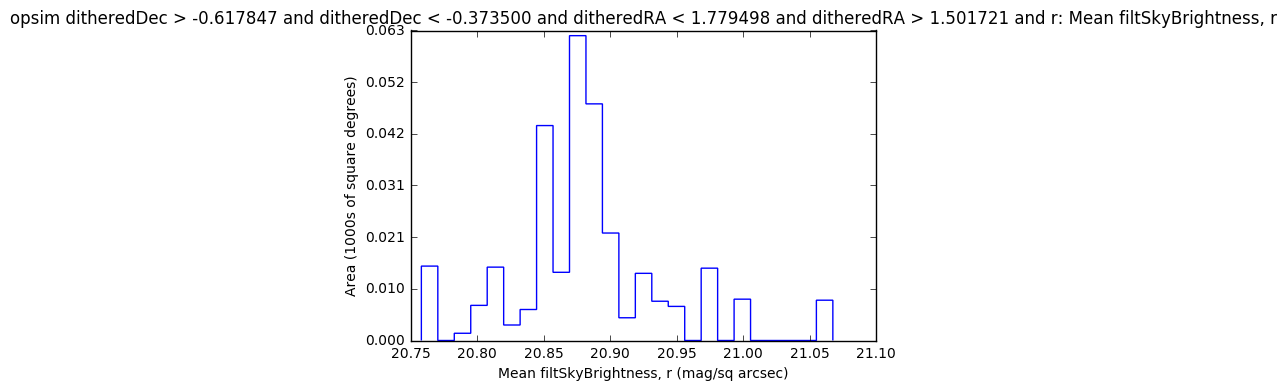

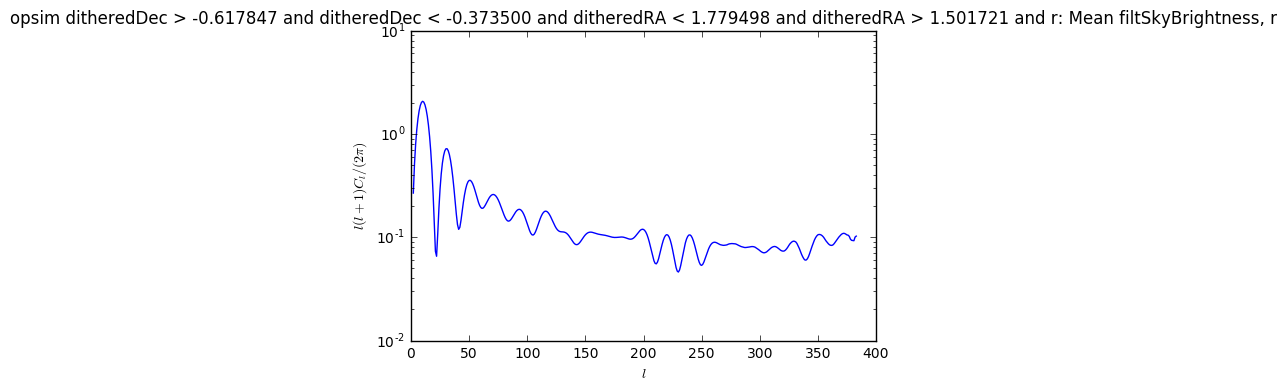

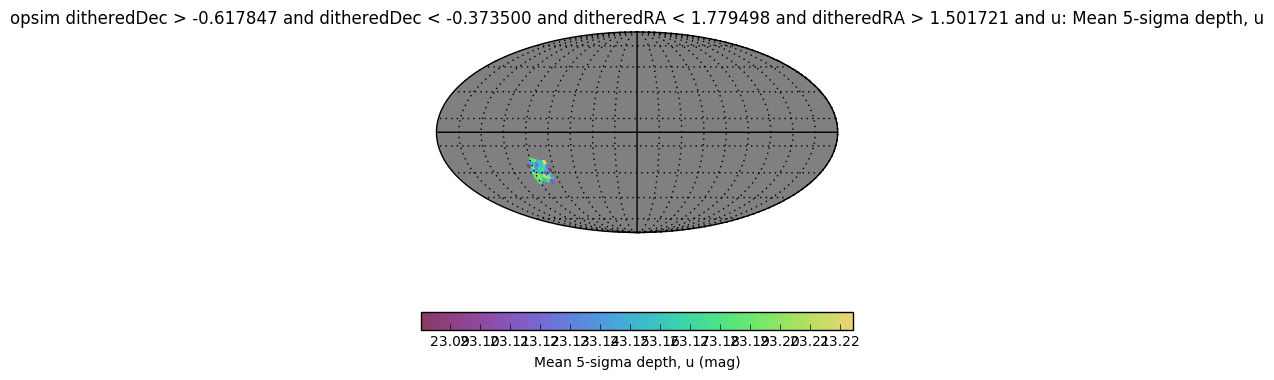

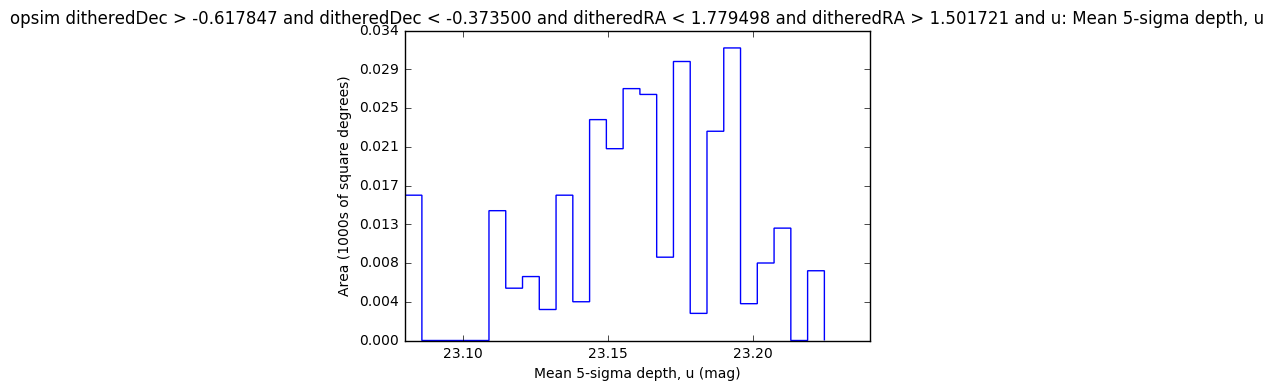

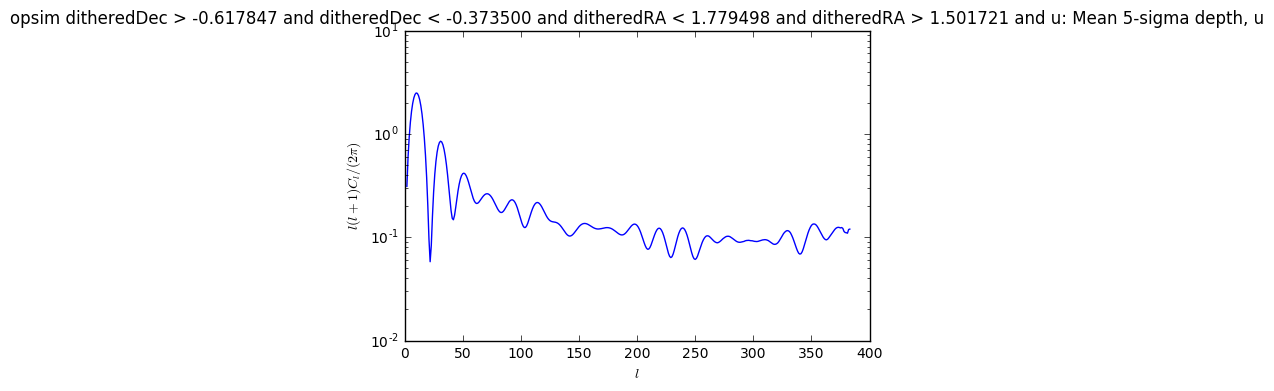

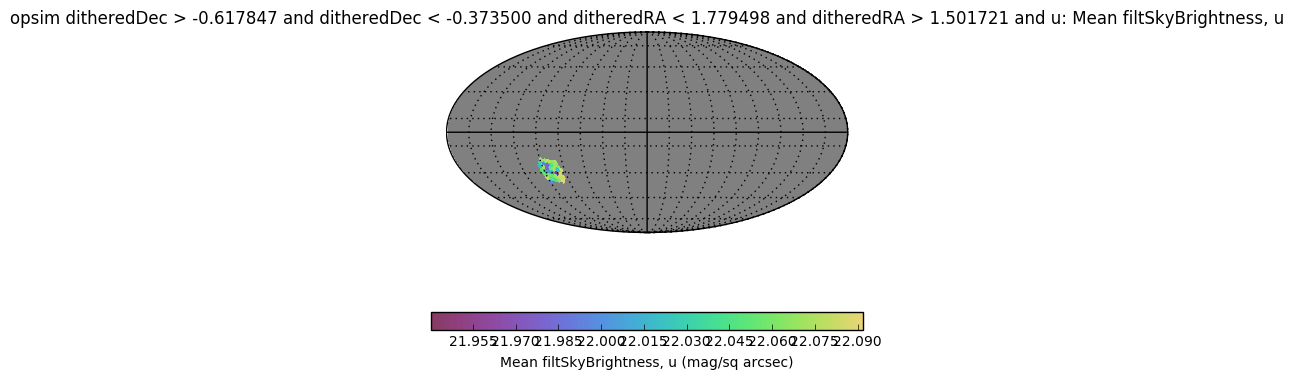

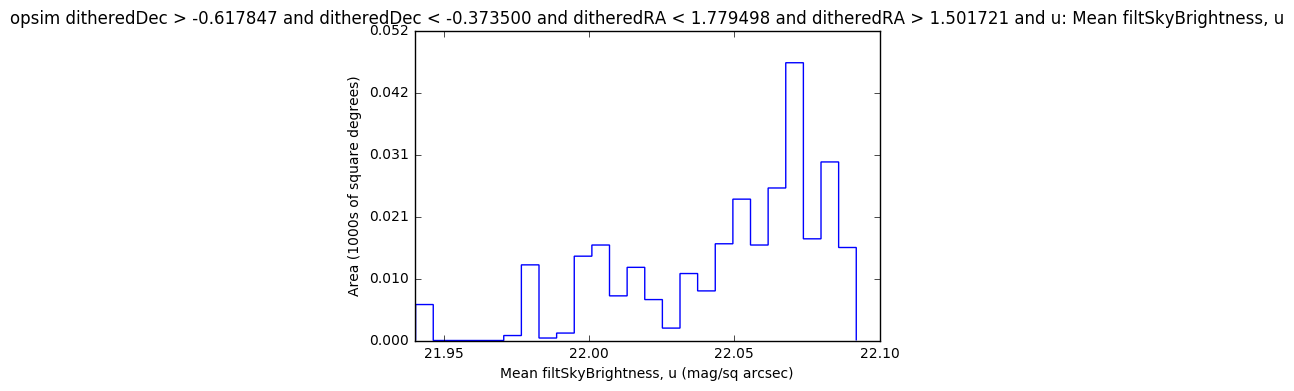

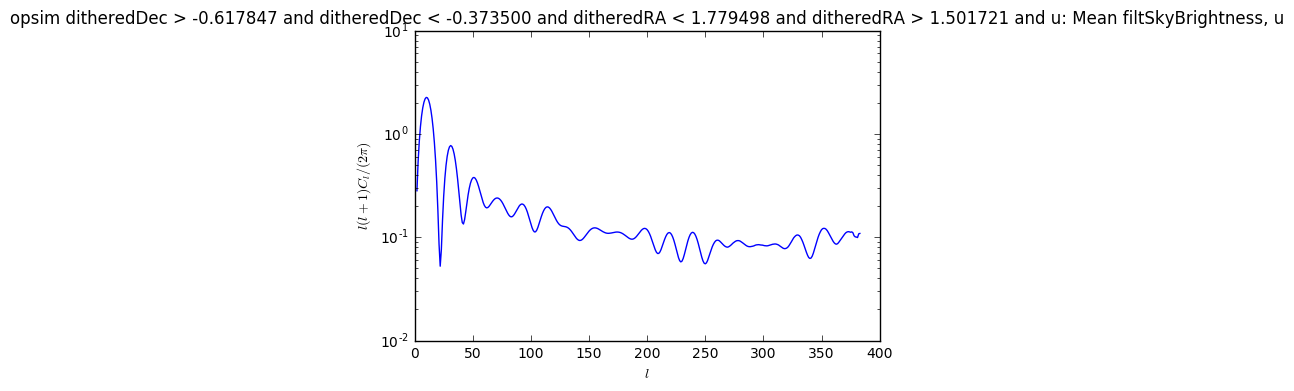

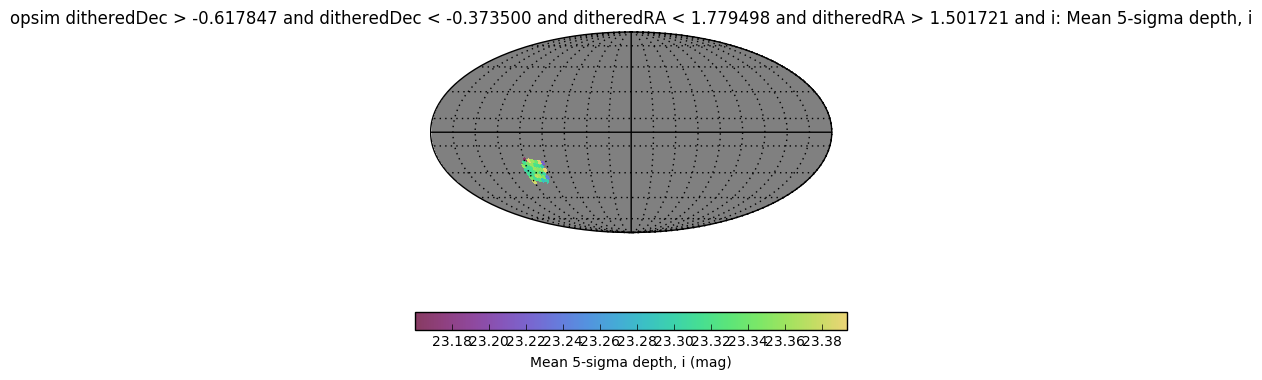

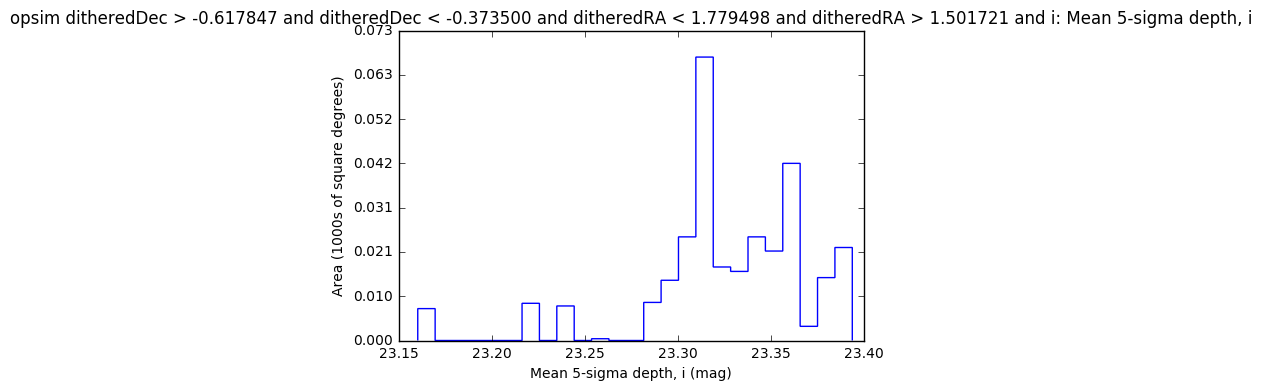

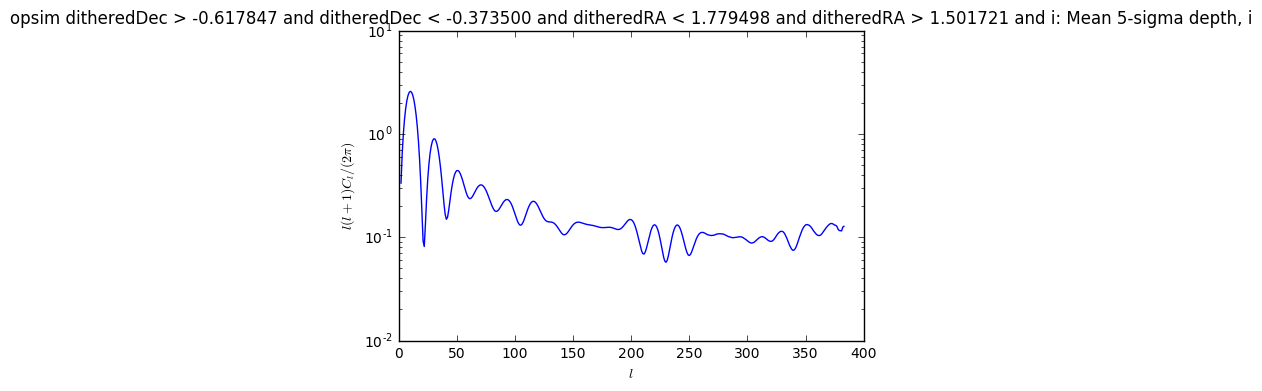

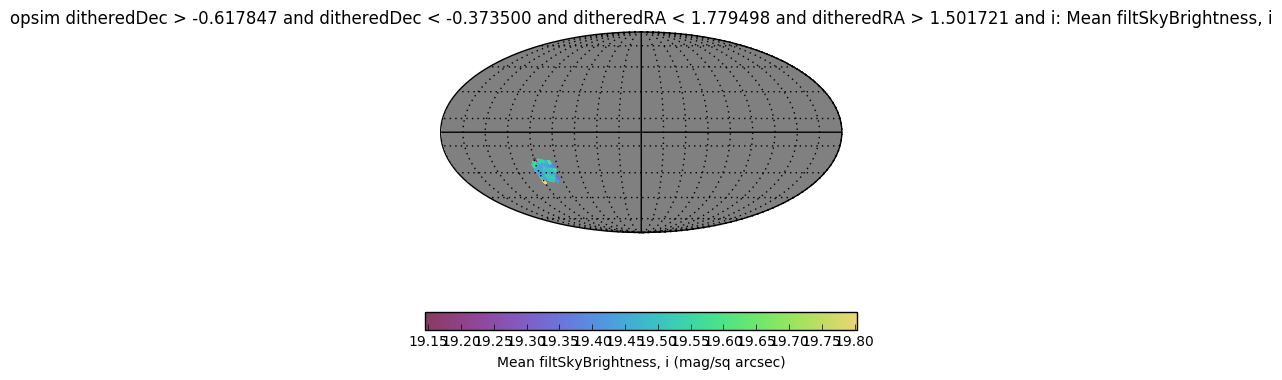

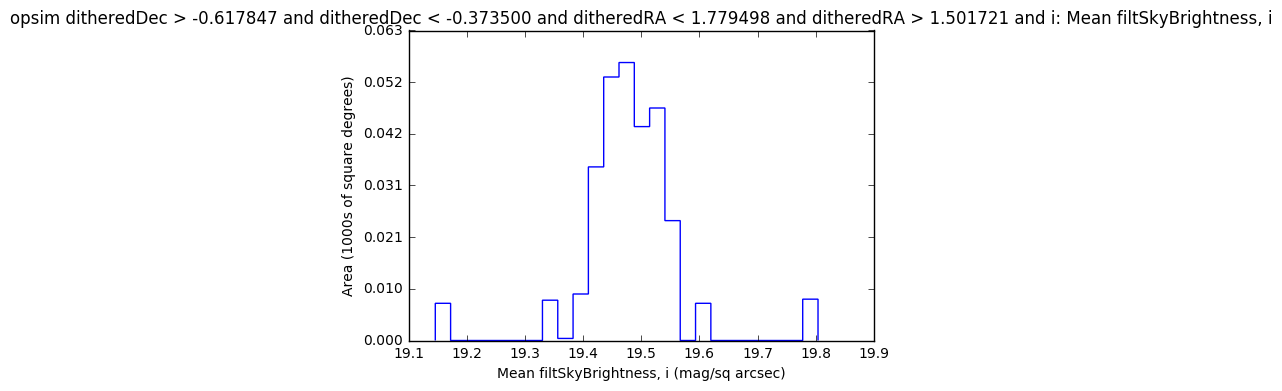

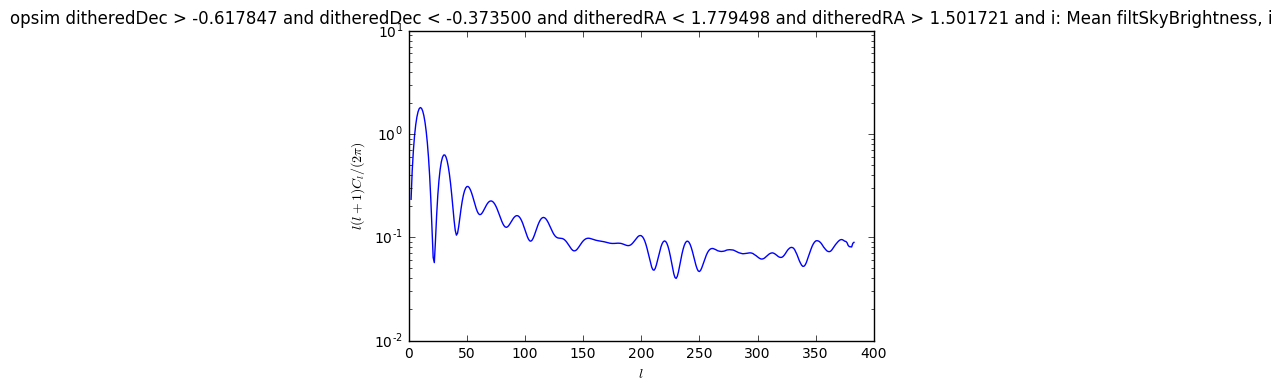

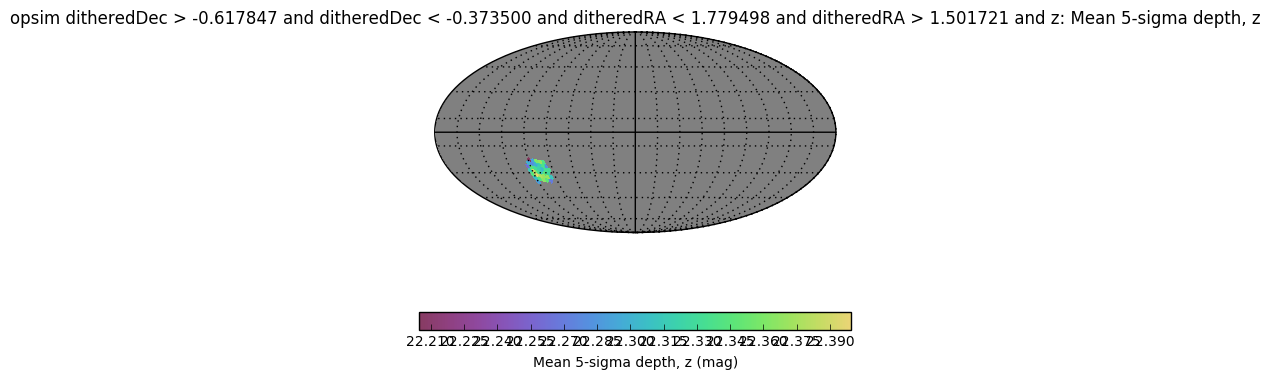

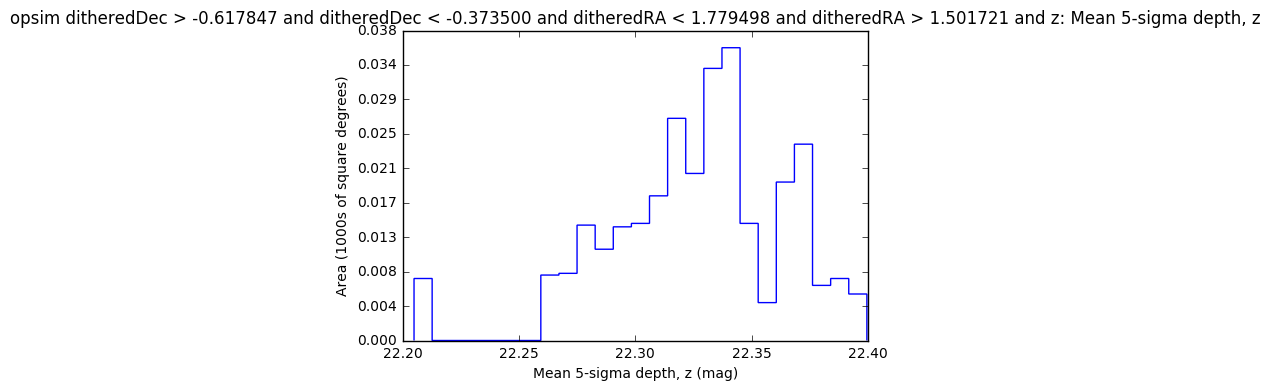

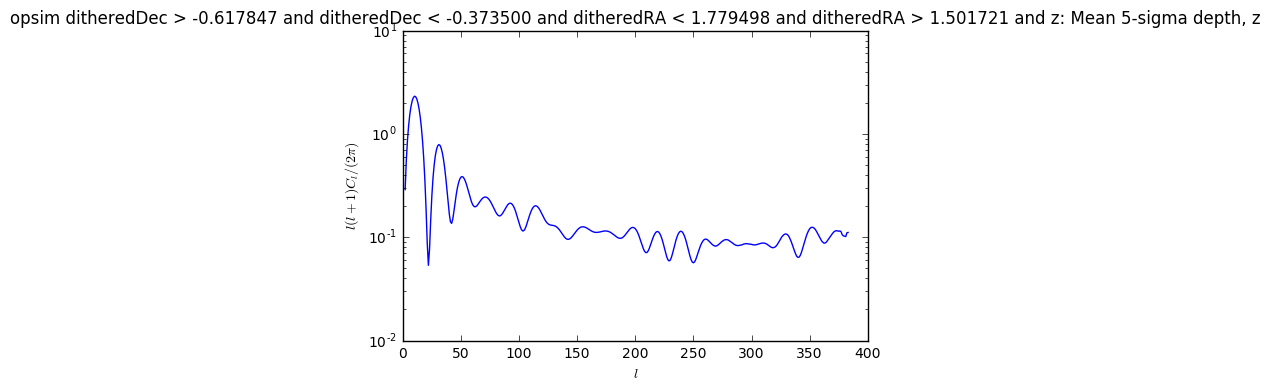

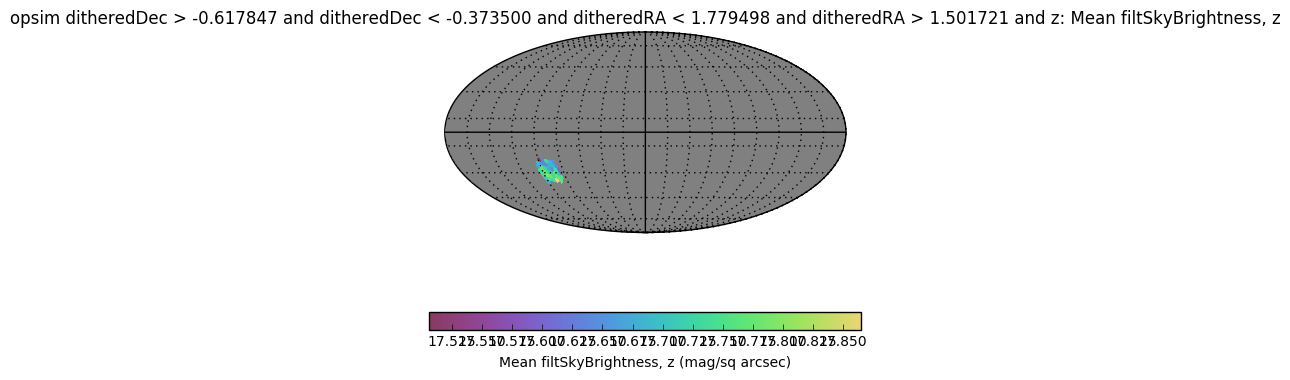

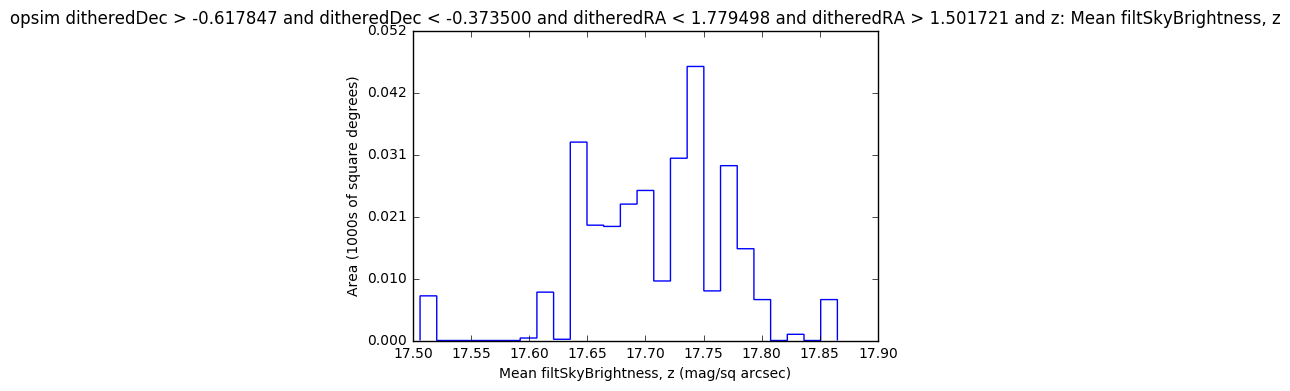

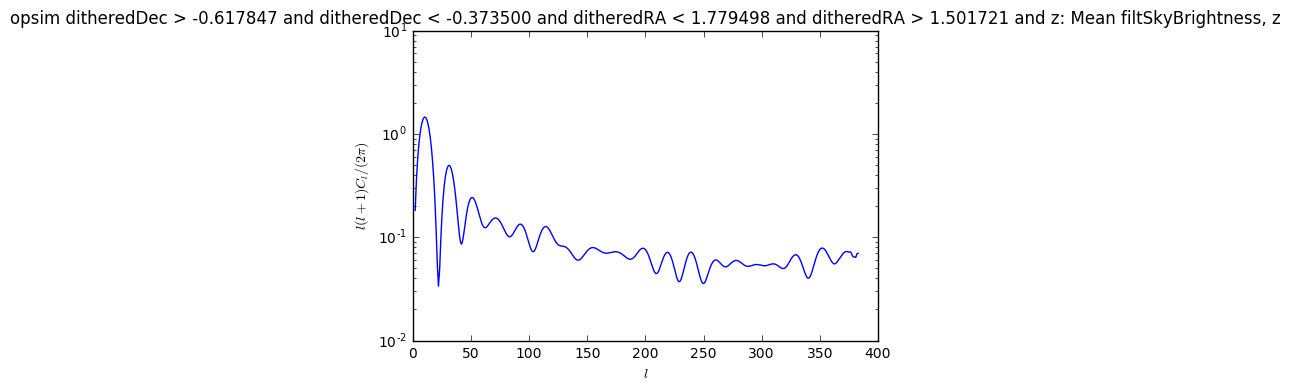

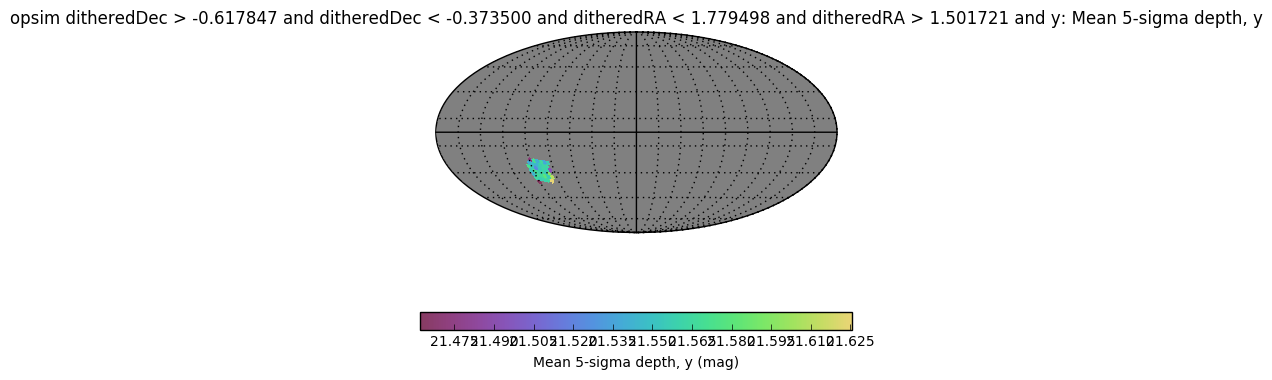

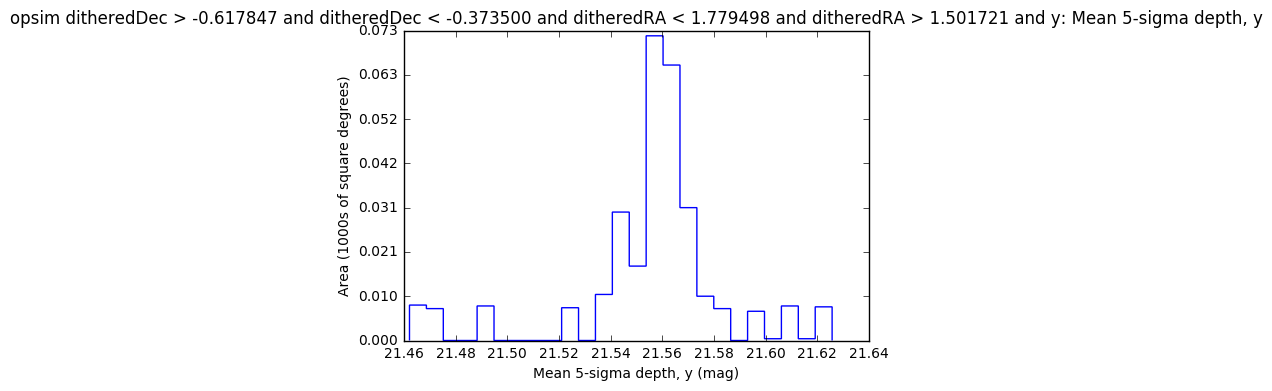

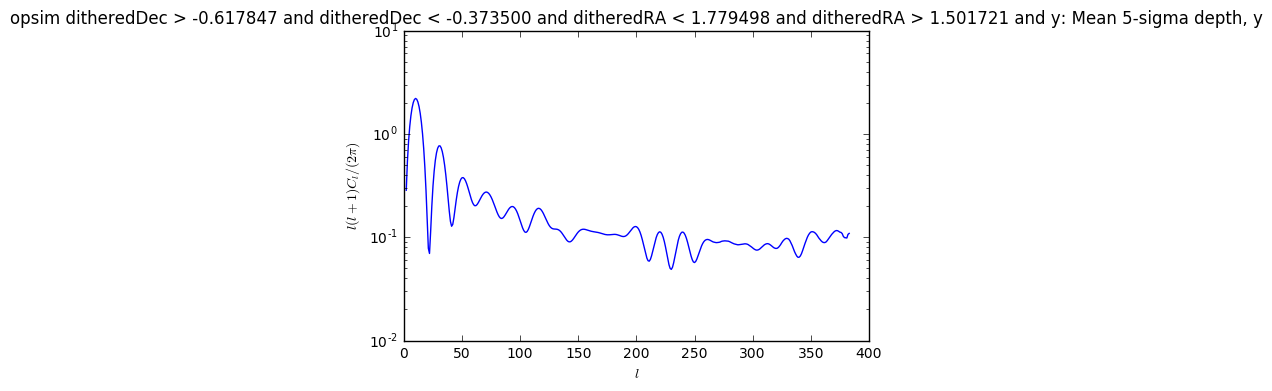

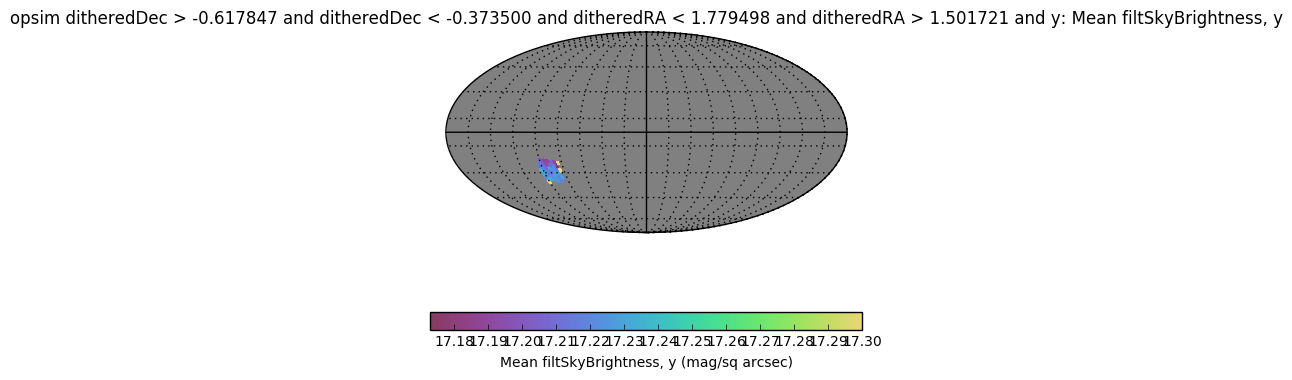

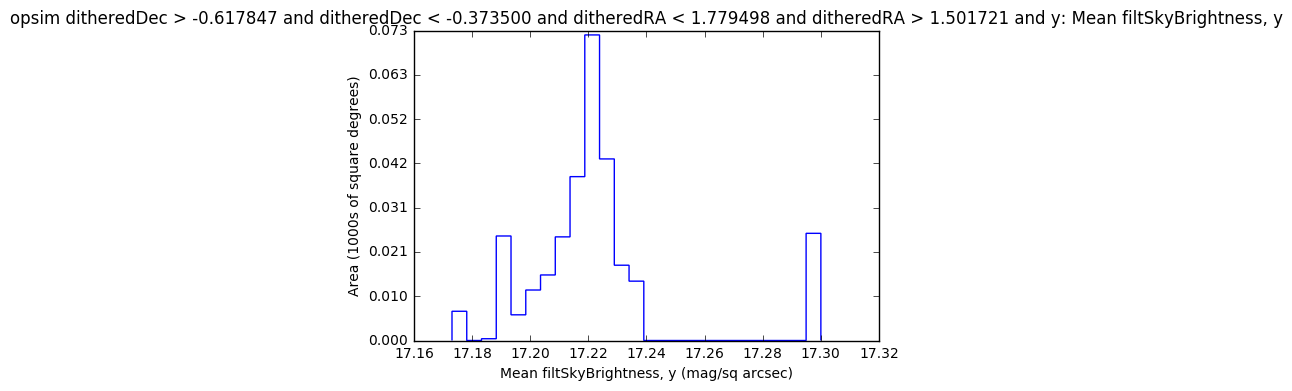

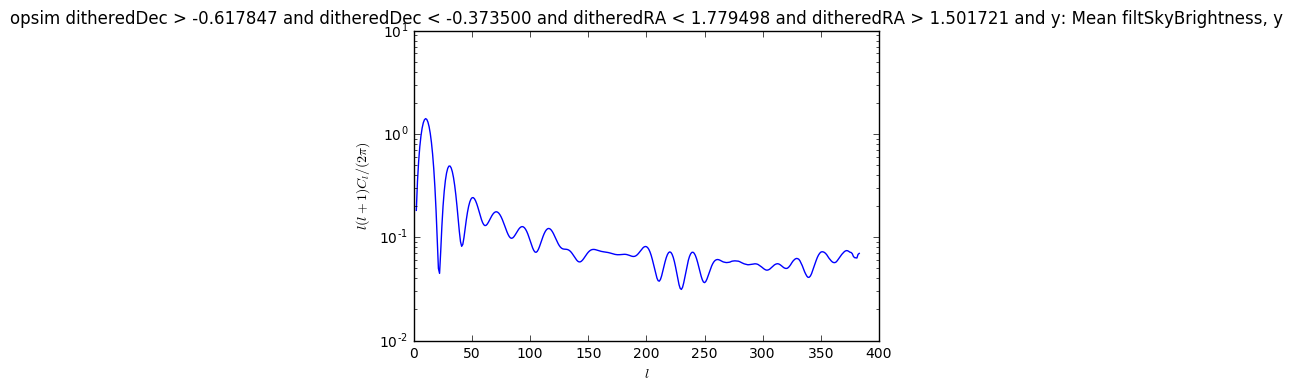

In [13]:
bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)

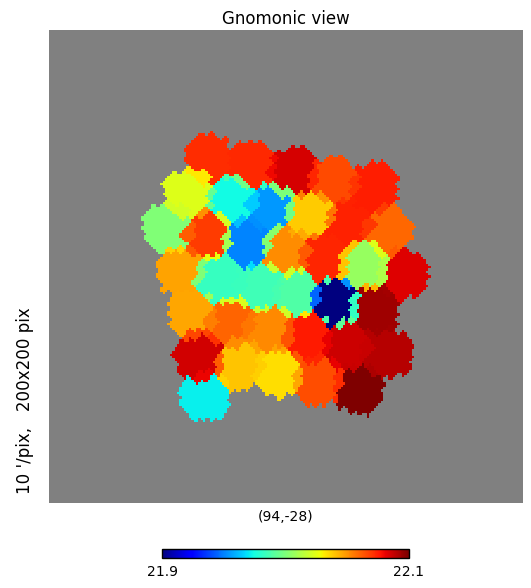

In [23]:
# Wow, that little region isn't too helpful, lets inspect it in more detail
import healpy as hp
hp.gnomview(bundleList[0].metricValues, rot=(94, -28), reso=10)